In [1]:
from DP54 import DP54_solver
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time
from matplotlib.gridspec import GridSpec
import numba

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')  
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.fontsize'] = 13

In [3]:
t_range = np.array((0.0, 10.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 2.0, 0.0))
argv = np.array((1.0, 1.0)) # argv[x, x] is a and b in Prey-Predator
reps = 1e-8
aeps = 1e-10
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(110) # 
t_history, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
x_history_1 = x_history[:, 0]
x_history_2 = x_history[:, 1]


Time: 0.000020 seconds
step size number is: 109


In [4]:
def Prey_Predato(t, y, a, b):
    return [a * (1 - y[1]) * y[0], - b * (1 - y[0]) * y[1]]

In [5]:
start = time.perf_counter()
a = argv[0]
b = argv[1]
#t_eval = np.linspace(t_range[0], t_range[1], Nsamples + 1)
result = solve_ivp(
    fun=lambda t, y: Prey_Predato(t, y, a, b),
    t_span=t_range,
    y0=x0[0:2],
    method='RK45',      
    #t_eval=t_eval,      
    rtol=reps,          
    atol=aeps,          
    first_step=h_size[0],  
    max_step=h_size[1]     
)

end = time.perf_counter()
elapsed = end - start

print(f"Time: {elapsed} seconds")

t_history_scipy = result.t           
x_history_1_scipy = result.y[0, :]   
x_history_2_scipy = result.y[1, :]   
step_sizes = np.diff(result.t)

Time: 0.0037841249722987413 seconds


In [6]:
start = time.perf_counter()
a = argv[0]
b = argv[1]
#t_eval = np.linspace(t_range[0], t_range[1], Nsamples + 1)
result = solve_ivp(
    fun=lambda t, y: Prey_Predato(t, y, a, b),
    t_span=t_range,
    y0=x0[0:2],
    method='RK23',      
    #t_eval=t_eval,      
    rtol=reps,          
    atol=aeps,          
    first_step=h_size[0],  
    max_step=h_size[1]     
)

end = time.perf_counter()
elapsed = end - start

print(f"Time: {elapsed} seconds")

t_history_scipy2 = result.t    
x_history_1_scipy2 = result.y[0, :]   
x_history_2_scipy2 = result.y[1, :]        
step_sizes2 = np.diff(result.t)

Time: 0.01997299981303513 seconds


In [7]:
result

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-06 ...  9.993e+00  1.000e+01]
        y: [[ 2.000e+00  2.000e+00 ...  3.248e-01  3.258e-01]
            [ 2.000e+00  2.000e+00 ...  5.307e-01  5.282e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4744
     njev: 0
      nlu: 0

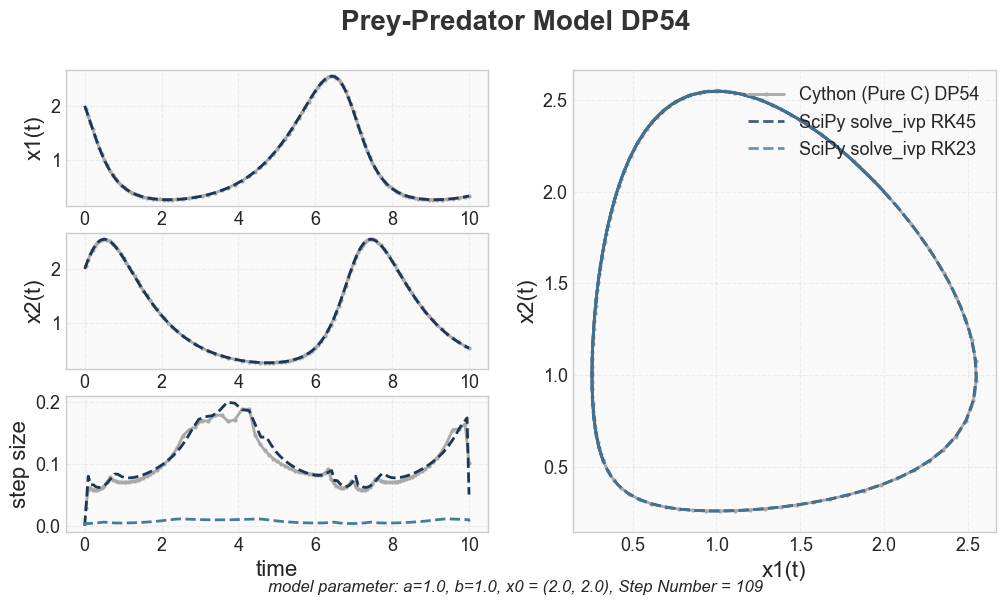

In [8]:
fig = plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid') 
gs = GridSpec(3, 2, figure=fig)
pic1 = fig.add_subplot(gs[0, 0])
pic2 = fig.add_subplot(gs[1, 0])
pic4 = fig.add_subplot(gs[2, 0])
pic3 = fig.add_subplot(gs[:, 1])
pic1.plot(t_history, x_history_1, '#A9A9A9', linewidth=2, markersize=4, marker='.', label=f'a = {argv[0]}, b = {argv[1]}', alpha=1)    
pic2.plot(t_history, x_history_2, '#A9A9A9', linewidth=2, markersize=4, marker='.', label=f'a = {argv[0]}, b = {argv[1]}', alpha=1) 
pic1.plot(t_history_scipy, x_history_1_scipy, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--')    
pic2.plot(t_history_scipy, x_history_2_scipy, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--') 
pic3.plot(x_history_1, x_history_2, '#A9A9A9', linewidth=2, marker='.', markersize=4, label=f'Cython (Pure C) DP54', alpha=1)    
pic4.plot(t_adaptive, t_adaptive_size, '#A9A9A9', linewidth=2, marker='.', markersize=4, label=f'a = {argv[0]}, b = {argv[1]}', alpha=1)  
pic4.plot(t_history_scipy[1:], step_sizes, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--')  
pic4.plot(t_history_scipy2[1:], step_sizes2, '#457B9D', linewidth=2, markersize=4, alpha=1, linestyle='--') 
pic3.plot(x_history_1_scipy, x_history_2_scipy, '#1D3557', linewidth=2, markersize=4, label=f'SciPy solve_ivp RK45', alpha=0.8, linestyle='--') 
pic3.plot(x_history_1_scipy2, x_history_2_scipy2, '#457B9D', linewidth=2, markersize=4, label=f'SciPy solve_ivp RK23', alpha=0.8, linestyle='--')    
#pic4.set_yscale('log')  
pic1.set_ylabel('x1(t)')
pic2.set_ylabel('x2(t)')
pic4.set_xlabel('time')
pic4.set_ylabel('step size')
pic2.grid(True, which="both", ls="--", alpha=0.3)
pic4.grid(True, which="both", ls="--", alpha=0.3)
pic1.grid(True, which="both", ls="--", alpha=0.3)
pic3.set_xlabel('x1(t)')
pic3.set_ylabel('x2(t)')
pic3.grid(True, which="both", ls="--", alpha=0.3)
pic3.legend(loc='upper right') 
pic1.set_facecolor('#f9f9f9')
pic2.set_facecolor('#f9f9f9')
pic3.set_facecolor('#f9f9f9')
pic4.set_facecolor('#f9f9f9')

#fig.suptitle('Prey-Predator Model ', fontsize=18, fontweight='bold')
fig.suptitle('Prey-Predator Model DP54', fontsize=20, fontweight='bold', color='#333333', y=0.98)
fig.text(0.5, 0.01, f'model parameter: a={argv[0]}, b={argv[1]}, x0 = {x0[0], x0[1]}, Step Number = {t_history.shape[0]}', ha='center', fontsize=12, style='italic')
fig.savefig("DP54_prey.png")

# Performance compare

In [9]:
N1 = []
N2 = []
T1 = []
T2 = []
T3 = []
T4 = []
reps = 1e-6
aeps = 1e-8
t_range = np.array((0.0, 10.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 2.0, 0))
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(50) # 
start = time.perf_counter()
t_history1, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end1 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end2 = time.perf_counter()
t_range = np.array((0.0, 10.0))
h_size = np.array((1e-6 ,1e-1))
x0 = np.array((2.0, 2.0, 0))
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(50) # 
end3 = time.perf_counter()
t_history2, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end4 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end5 = time.perf_counter()

print(f"By Cython (Pure C language)(max of h_size: 1): {end1 - start} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 1): {end2 - end1} seconds")
print(f"run time Speed up(max of h_size: 1):{(end2 - end1) / (end1 - start)}")
print(f"By Cython (Pure C language)(max of h_size: 0.1): {end4 - end3} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 0.1): {end5 - end4} seconds")
print(f"run time Speed up(max of h_size: 0.1):{(end5 - end4) / (end4 - end3)}")
N1.append(t_history1.shape[0])
N2.append(t_history2.shape[0])
T1.append(end1 - start)
T2.append(end2 - end1)
T3.append(end4 - end3)
T4.append(end5 - end4)
t_range = np.array((0.0, 100.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 2.0, 0))
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(500) # 
start = time.perf_counter()
t_history1, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end1 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end2 = time.perf_counter()
t_range = np.array((0.0, 100.0))
h_size = np.array((1e-6 ,1e-1))
x0 = np.array((2.0, 2.0, 0))
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(500) # 
end3 = time.perf_counter()
t_history2, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end4 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end5 = time.perf_counter()

print(f"By Cython (Pure C language)(max of h_size: 1): {end1 - start} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 1): {end2 - end1} seconds")
print(f"run time Speed up(max of h_size: 1):{(end2 - end1) / (end1 - start)}")
print(f"By Cython (Pure C language)(max of h_size: 0.1): {end4 - end3} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 0.1): {end5 - end4} seconds")
print(f"run time Speed up(max of h_size: 0.1):{(end5 - end4) / (end4 - end3)}")
N1.append(t_history1.shape[0])
N2.append(t_history2.shape[0])
T1.append(end1 - start)
T2.append(end2 - end1)
T3.append(end4 - end3)
T4.append(end5 - end4)
t_range = np.array((0.0, 1000.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 2.0, 0))
argv = np.array((1.0, 1.0)) # argv[x, x] is a and b in Prey-Predator
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(5000) # 
start = time.perf_counter()
t_history1, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end1 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end2 = time.perf_counter()
t_range = np.array((0.0, 1000.0))
h_size = np.array((1e-6 ,1e-1))
x0 = np.array((2.0, 2.0, 0))
argv = np.array((1.0, 1.0)) # argv[x, x] is a and b in Prey-Predator
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(5000) # 
end3 = time.perf_counter()
t_history2, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end4 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end5 = time.perf_counter()

print(f"By Cython (Pure C language)(max of h_size: 1): {end1 - start} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 1): {end2 - end1} seconds")
print(f"run time Speed up(max of h_size: 1):{(end2 - end1) / (end1 - start)}")
print(f"By Cython (Pure C language)(max of h_size: 0.1): {end4 - end3} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 0.1): {end5 - end4} seconds")
print(f"run time Speed up(max of h_size: 0.1):{(end5 - end4) / (end4 - end3)}")
N1.append(t_history1.shape[0])
N2.append(t_history2.shape[0])
T1.append(end1 - start)
T2.append(end2 - end1)
T3.append(end4 - end3)
T4.append(end5 - end4)
t_range = np.array((0.0, 10000.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 2.0, 0))
argv = np.array((1.0, 1.0)) # argv[x, x] is a and b in Prey-Predator
num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(50000) # 
start = time.perf_counter()
t_history1, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end1 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end2 = time.perf_counter()
t_range = np.array((0.0, 10000.0))
h_size = np.array((1e-6 ,1e-1))
x0 = np.array((2.0, 2.0, 0))

num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(50000) # 
end3 = time.perf_counter()
t_history2, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end4 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end5 = time.perf_counter()

print(f"By Cython (Pure C language)(max of h_size: 1): {end1 - start} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 1): {end2 - end1} seconds")
print(f"run time Speed up(max of h_size: 1):{(end2 - end1) / (end1 - start)}")
print(f"By Cython (Pure C language)(max of h_size: 0.1): {end4 - end3} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 0.1): {end5 - end4} seconds")
print(f"run time Speed up(max of h_size: 0.1):{(end5 - end4) / (end4 - end3)}")
N1.append(t_history1.shape[0])
N2.append(t_history2.shape[0])
T1.append(end1 - start)
T2.append(end2 - end1)
T3.append(end4 - end3)
T4.append(end5 - end4)
t_range = np.array((0.0, 100000.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 2.0, 0))

num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(500000) # 
start = time.perf_counter()
t_history1, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end1 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end2 = time.perf_counter()
t_range = np.array((0.0, 100000.0))
h_size = np.array((1e-6 ,1e-1))
x0 = np.array((2.0, 2.0, 0))

num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(500000) # 
end3 = time.perf_counter()
t_history2, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end4 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end5 = time.perf_counter()

print(f"By Cython (Pure C language)(max of h_size: 1): {end1 - start} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 1): {end2 - end1} seconds")
print(f"run time Speed up(max of h_size: 1):{(end2 - end1) / (end1 - start)}")
print(f"By Cython (Pure C language)(max of h_size: 0.1): {end4 - end3} seconds")
print(f"By scipy solve_ivp RK45(max of h_size: 0.1): {end5 - end4} seconds")
print(f"run time Speed up(max of h_size: 0.1):{(end5 - end4) / (end4 - end3)}")
N1.append(t_history1.shape[0])
N2.append(t_history2.shape[0])
T1.append(end1 - start)
T2.append(end2 - end1)
T3.append(end4 - end3)
T4.append(end5 - end4)
t_range = np.array((0.0, 1000000.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 2.0, 0))

num_var = np.size(x0)
model = 2 # 2 is Prey-Predator model
MAX_STEPS = int(5000000) # 
start = time.perf_counter()
t_history, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)
end1 = time.perf_counter()
result = solve_ivp(
        fun=lambda t, y: Prey_Predato(t, y, a, b),
        t_span=t_range,
        y0=x0[0:2],
        method='RK45',      
        #t_eval=t_eval,      
        rtol=reps,          
        atol=aeps,          
        first_step=h_size[0],  
        max_step=h_size[1]     
    )
end2 = time.perf_counter()
print(f"By Cython (Pure C language): {end1 - start} seconds")
print(f"By scipy solve_ivp RK45: {end2 - end1} seconds")
print(f"run time Speed up:{(end2 - end1) / (end1 - start)}")
N1.append(t_history.shape[0])
T1.append(end1 - start)
T2.append(end2 - end1)


Time: 0.000013 seconds
step size number is: 45
Time: 0.000019 seconds
step size number is: 45
By Cython (Pure C language)(max of h_size: 1): 5.0958944484591484e-05 seconds
By scipy solve_ivp RK45(max of h_size: 1): 0.006467333063483238 seconds
run time Speed up(max of h_size: 1):126.91261816536984
By Cython (Pure C language)(max of h_size: 0.1): 0.00018258392810821533 seconds
By scipy solve_ivp RK45(max of h_size: 0.1): 0.02018454112112522 seconds
run time Speed up(max of h_size: 0.1):110.5493858646862
Time: 0.000046 seconds
step size number is: 421
Time: 0.000047 seconds
step size number is: 421
By Cython (Pure C language)(max of h_size: 1): 0.0001341251190751791 seconds
By scipy solve_ivp RK45(max of h_size: 1): 0.013176749926060438 seconds
run time Speed up(max of h_size: 1):98.24222350680394
By Cython (Pure C language)(max of h_size: 0.1): 8.420785889029503e-05 seconds
By scipy solve_ivp RK45(max of h_size: 0.1): 0.018631083192303777 seconds
run time Speed up(max of h_size: 0.1):22

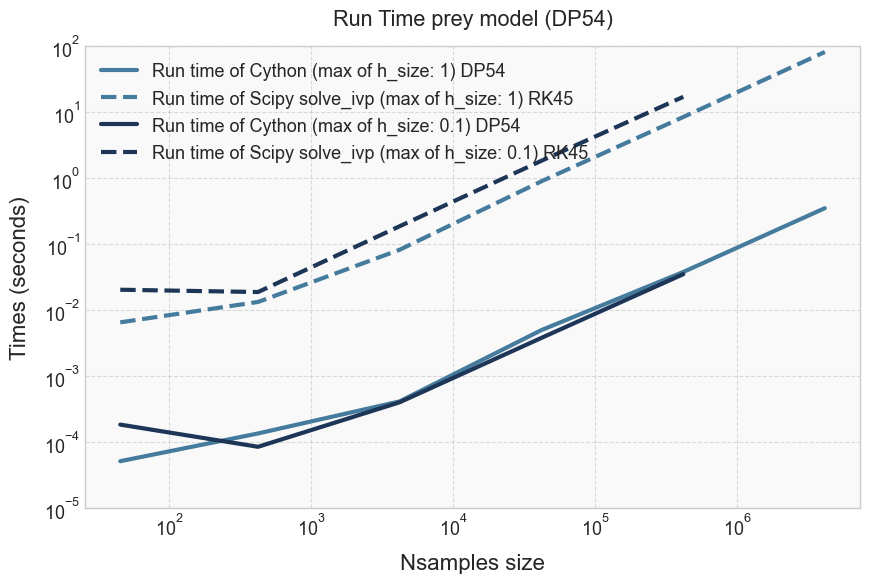

In [10]:
fig, pic6 = plt.subplots(figsize=(10, 6))
pic6.plot(N1, T1, linewidth =3.0, c = "#457B9D", label = "Run time of Cython (max of h_size: 1) DP54")
pic6.plot(N1, T2, linewidth =3.0, linestyle='--', c = "#457B9D", label = "Run time of Scipy solve_ivp (max of h_size: 1) RK45")
pic6.plot(N2, T3, linewidth =3.0, c = "#1D3557", label = "Run time of Cython (max of h_size: 0.1) DP54")
pic6.plot(N2, T4, linewidth =3.0, linestyle='--', c = "#1D3557", label = "Run time of Scipy solve_ivp (max of h_size: 0.1) RK45")
pic6.set_yscale('log') 
pic6.set_xscale('log') 
pic6.set_ylim(1e-5, 1e2)
pic6.legend(fontsize=13, loc = 'upper left',frameon=False, fancybox=True)
pic6.grid(True, ls="--", alpha=0.7)
pic6.set_title('Run Time prey model (DP54)', pad=15)
pic6.set_xlabel('Nsamples size', labelpad=10)
pic6.set_ylabel('Times (seconds)', labelpad=10)
plt.savefig("Run_times_prey DP54.png")
pic6.set_facecolor('#f9f9f9')